<a href="https://colab.research.google.com/github/nrjcs/iitpbse/blob/master/dl/day1/XOR_gate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Implementation of XOR gate

In [1]:
import keras
import numpy as np
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense


## Use one of the training sets: set 1 or set 2

In [2]:
# Training set 1
# This will be used to train the network

# Input to the gate
x_train = np.array([[0,0],[0,1],[1,0],[1,1]], "uint8") 

# Ouput of the gate, the truth value
y_train = np.array([[0],[1],[1],[0]], "uint8")

In [3]:
# # Training set 2 
# # Let us use real nos. instead of binary int values

# # Input to the gate
# x_train = np.random.uniform(low = 0, high = 1,size=400)
# x_train = np.reshape(x_train, [-1,2])
# print(x_train.shape)

# # Output or truth values for inputs
# y_train = np.zeros([x_train.shape[0]])
# print(len(y_train))
# for i in range(x_train.shape[0]):
#     if x_train[i,0]>=0.5 and x_train[i,1]>=0.5:
#         y_train[i]=0
#     if x_train[i,0]>=0.5 and x_train[i,1]<0.5:
#         y_train[i]=1
#     if x_train[i,0]<0.5 and x_train[i,1]>=0.5:
#         y_train[i]=1
#     if x_train[i,0]<0.5 and x_train[i,1]<0.5:
#         y_train[i]=0
        
# # let's check the values in training set
# print(x_train[:10])
# print(y_train[:10])


## We will discuss two models for XOR and see the concept of linear separability

In [16]:
# Model 1: This model will not perform as desired

# Create neural networks model
# A sequential model is one where layers are stacked one
# after another and there is not skipping, feedback and
# distributed connection

model = Sequential()

# Add a single dense layer to the model
model.add(Dense(1, activation='softmax', input_dim=2))      # first hidden layer


In [24]:
# # Model 2: Observe why this model works better

# # Create neural networks model
# # A sequential model is one where layers are stacked one
# # after another and there is not skipping, feedback and
# # distributed connection

model = Sequential()

# # Define the model layers
# # Compare it will model 1
model.add(Dense(units=2,activation= 'sigmoid',input_dim=2))
model.add(Dense(units=2,activation= 'sigmoid',input_dim=2))
model.add(Dense(units=2,activation= 'sigmoid',input_dim=2))
model.add(Dense(units=1,activation='softmax'))

In [25]:
# Check the model summary

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 3         
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


In [26]:
# Compile the neural networks model

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [27]:
# Train the neural networks model

history = model.fit(x_train, y_train, epochs=1000)

Epoch 1/1000
1/1 [==============================] - 0s 483ms/step - loss: 0.6935 - accuracy: 0.5000
Epoch 2/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.6935 - accuracy: 0.5000
Epoch 3/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.6935 - accuracy: 0.5000
Epoch 4/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.6934 - accuracy: 0.5000
Epoch 5/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.6934 - accuracy: 0.5000
Epoch 6/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.6934 - accuracy: 0.5000
Epoch 7/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.6934 - accuracy: 0.5000
Epoch 8/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.6933 - accuracy: 0.5000
Epoch 9/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.6933 - accuracy: 0.5000
Epoch 10/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.6933 - accuracy: 0.5000
Epoch 11/1000
1/

In [28]:
# Let's plot some graphs to see how training went by

history.history.keys()

dict_keys(['loss', 'accuracy'])

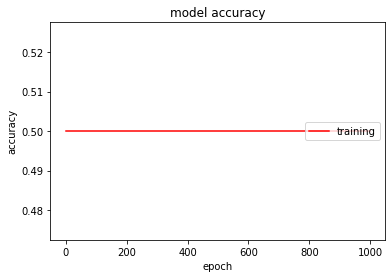

In [29]:
# Behaviour of accuracy over the epochs

plt.plot(history.history['accuracy'],'r')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training'], loc='center right')
plt.show()

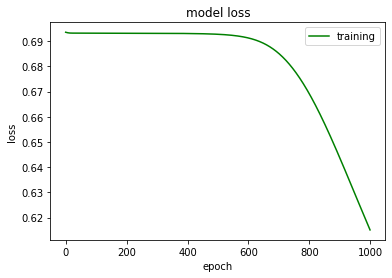

In [30]:
# Behviour of loss over the epochs

plt.plot(history.history['loss'],'g')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training'], loc='upper right')
plt.show()

In [31]:
# Let's do some prediction

test = np.array([[0.1,0.1]])
model.predict(test,batch_size=1)

array([[1.]], dtype=float32)